# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. Here's a short description of its columns:

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

We'll require the following libraries: 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Importing the dataset 

 Load the csv:  

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

print(f"Shape of the dataframe: {df.shape}")
df.head()

Shape of the dataframe: (21613, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print("The data types of each column:")
df.dtypes

The data types of each column:


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
print("A statistical summary of the dataframe:")
df.describe()

A statistical summary of the dataframe:


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Wrangling

*   Remove unnecessary data (`id`, `Unnamed`)
*   Replace missing values with the mean(`bedrooms`, `bathrooms`)



In [5]:
# Drop the columns "id" and "Unnamed: 0"
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>.

In [6]:
print(f"number of NaN values for the column bedrooms : {df['bedrooms'].isnull().sum()}")
print(f"number of NaN values for the column bathrooms : {df['bathrooms'].isnull().sum()}")

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Let's replace the missing values of the columns `bedrooms` and `bathrooms` with the mean of each column's values. 

In [7]:
df.replace({'bedrooms': {np.nan: df['bedrooms'].mean()}, 'bathrooms': {np.nan: df['bathrooms'].mean()}}, inplace= True)    # or df.replace({'bedrooms': np.nan, 'bathrooms': np.nan}, {'bedrooms': df['bedrooms'].mean(), 'bathrooms': df['bathrooms'].mean()})
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
print(f"number of NaN values for the column bedrooms : {df['bedrooms'].isnull().sum()}")
print(f"number of NaN values for the column bathrooms : {df['bathrooms'].isnull().sum()}")

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## Exploratory Data Analysis

*   Count the number of houses with unique floor values
*   Determine the extent of `price` outliers wrt `waterfront`.  
*   Find out correlation of the independent features with `price`.

In [9]:
df["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


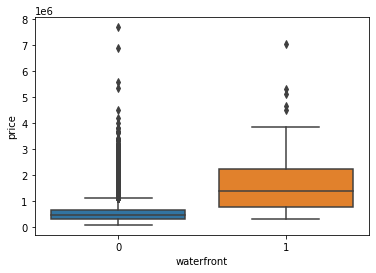

In [10]:
# Determine whether houses with a waterfront view or without a waterfront view have more `price` outliers.
sns.boxplot(x='waterfront', y= 'price', data =df)

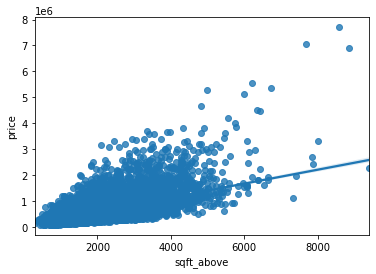

In [11]:
# Determine if the feature sqft_above is negatively or positively correlated with price.
sns.regplot(x='sqft_above', y='price', data= df )

In [12]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

So, other than price the feature `sqft_living` is the most correlated with `price`.


## Model Development

We can fit a linear regression model using the  longitude feature <code>'long'</code> and  calculate the coefficient of determination R^2.

In [13]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)

print(f"R^2 of this model = {lm.score(X, Y)}") 

R^2 of this model = 0.00046769430149007363


The above model can be considered as a baseline model since it's R^2 is fairly close to 0.

Let's fit a linear regression model to predict the <code>price</code> using the feature <code>sqft_living</code> then calculate the R^2.

In [14]:
X1 = df[['sqft_living']]
lr= LinearRegression()
lr.fit(X1,Y)

print(f"R^2 of this model = {lr.score(X1,Y)}") 

R^2 of this model = 0.49285321790379316


This implies that 49% of the variability of `price` has been accounted for, and the remaining 51% of the variability is still unaccounted for.

Let's fit a linear regression model to predict the <code>'price'</code> using below list of features (includes all features that have a positive correlation with `price` considering the correlation of `floors` as the touchstone):

In [15]:
features =["floors","waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [16]:
X_test= df[features]
lre= LinearRegression()
lre.fit(X_test, Y)

print(f"R^2 of this model = {lre.score(X_test, Y)}") 

R^2 of this model = 0.6576581908525534


### Using a Pipeline

Create a list of tuples, the first element in the tuple contains the name you want to give a particular step in the pipeline:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor 

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [17]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Using above list create a pipeline object to predict the `price`, fit the object using the features in the list <code>features</code>, and calculate the R^2.

In [18]:
pipe= Pipeline(Input)

pipe.fit(df[features], Y)
yhat = pipe.predict(df[features])

#The pipeline has all the methods that the last estimator in the pipeline has
print(f"R^2 of this model = {pipe.score(df[features], Y)}")

R^2 of this model = 0.7513410482623407


## Model Evaluation and Refinement

Import the necessary modules:

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:

In [20]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Ridge Regression

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 


In [23]:
from sklearn.linear_model import Ridge

rr= Ridge(alpha= 0.1)
rr.fit(x_train, y_train)

print(f"R^2 of the Ridge regression model = {rr.score(x_test, y_test)}")

R^2 of the Ridge regression model = 0.6478759163939117


Let's perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data setting the regularisation parameter to 0.1, and calculate the R^2 utilising the test data.

In [24]:
poly= PolynomialFeatures(degree= 2)
x_train_ptrf = poly.fit_transform(x_train)
x_test_ptrf = poly.fit_transform(x_test)

RR= Ridge(alpha= 0.1)
# fit using the transformed training data
RR.fit(x_train_ptrf, y_train)

print(f"R^2 of the Ridge regression model using the transformed data= {RR.score(x_test_ptrf, y_test)}")

R^2 of the Ridge regression model using the transformed data= 0.7002744277220405
